# 線形回帰

## 最急降下法

### データ準備

In [1]:
import pandas as pd
df = pd.read_csv('sample_data.csv')

In [2]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


### データ可視化

<AxesSubplot:xlabel='space', ylabel='rent'>

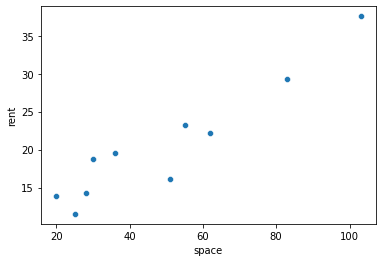

In [3]:
import seaborn as sns # 本来であればimport文はページの最初にまとめますが，講座形式のコードのため各所でimportしています
sns.scatterplot(x='space', y='rent', data=df)

### 損失関数定義

In [4]:
import numpy as np
x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))
cost_func(5, 7, x=x, y=y)

138703.20244638805

### 損失関数の可視化

In [5]:
import matplotlib.pyplot as plt
from itertools import product

# 軸の値の数
n0 = n1 = 300

# それぞれのパラメータθの最小値と最大値
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値設定
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
# plot_surface用に2次元にする
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(theta_0, theta_1))]
# plot_surface用に2次元にする
Z = np.array(z).reshape(n0, n1)

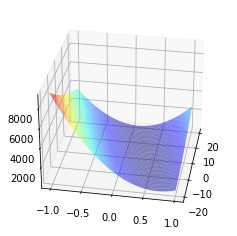

In [6]:
ax = plt.axes(projection='3d')
# meshgridとproductおよびreshapeの処理がそれぞれ行と列が逆になっているので転置.Tする
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

### 最急降下法

In [7]:
# 本来であれば初期値はランダム
# np.random.seed(0)
# theta_0_init = np.random.uniform(min_0, max_0)
# theta_1_init = np.random.uniform(min_1, max_1)

# 描画時にわかりやすいところに初期値を設定
theta_0_init = -5
theta_1_init = -0.5

# パラメータ更新
def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x) 

epochs = 100000
alpha = 0.00005

# パラメータ更新の履歴
theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

# 最急降下法
for _ in range(epochs):
    updated_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    updated_theta_1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(updated_theta_0)
    theta_1_hist.append(updated_theta_1)

In [8]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


### 結果の描画

In [9]:
# 損失の推移
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

### 3D描画

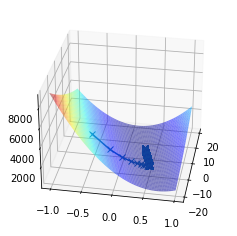

In [10]:
ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

### 等高線

Text(0, 0.5, 'theta 0')

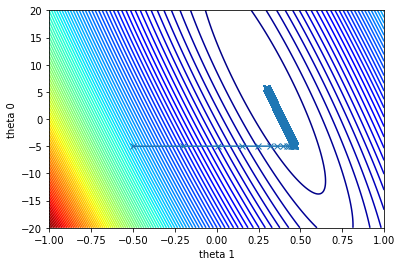

In [11]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

### 回帰直線

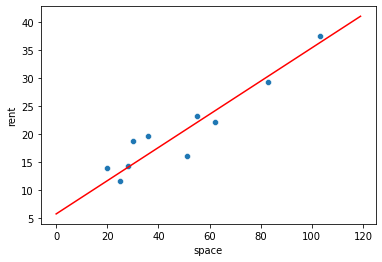

In [12]:
sns.scatterplot(x='space', y='rent', data=df)
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='r')

In [13]:
# 回帰直線を使って予測値を求める
space = 70
rent = theta_0_hist[-1] + theta_1_hist[-1]*space
rent

26.497676123575744

## 正規方程式

In [14]:
X = np.vstack([np.ones(len(x)), x]).T
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)
best_theta

array([7.0962325 , 0.27487161])

In [15]:
# 最急降下法の結果と比較
print(theta_0_hist[-1], theta_1_hist[-1])

5.692313583745944 0.2972194648547114


Text(0, 0.5, 'theta 0')

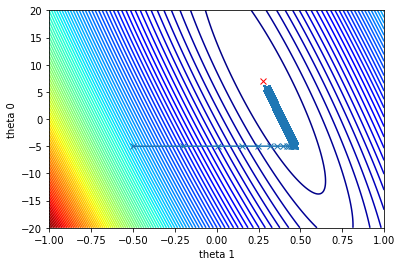

In [16]:
# 等高線に描画
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.plot(best_theta[1], best_theta[0], 'x', color='red')
plt.xlabel('theta 1')
plt.ylabel('theta 0')

## scikit-learnで線形回帰

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
# データ準備
x = df['space'].values
y = df['rent'].values
X = x.reshape(-1, 1)
model.fit(X, y)

LinearRegression()

In [19]:
# モデルの予測(入力は学習時と同じく二次元のArrayになることに注意)
model.predict([[30]])

array([15.34238078])

In [20]:
# coefficient 係数
model.coef_

array([0.27487161])

In [21]:
# intercept 切片
model.intercept_

7.096232499908833

In [22]:
# 正規方程式の結果と同じであることを確認
best_theta

array([7.0962325 , 0.27487161])